<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week03_1_instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple exploration notebook - instacart

https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-instacart

https://www.kaggle.com/code/yunju1118/esaa-yb-week3-1

The dataset is a relational set of files describing customers' orders over time.

## Objective:
The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million groceryorders from more than 200,000 instacart users

In [ ]:
# importing the necessary modules

import numpy as np # linear algebr
import pandas as pd # data processing, CSV file I/O (e.g. read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
# default = 'warn'

*%matplotlib inline*
* jupyter Notebook에서 그래프를 출력할 때 사용하며, plt.show()를 쓰지 않아도 자동으로 노트북에 plot이 출력
* matplotlib을 활용한 데이터 시각화 작업을 할 때 유용하게 사용

*pd.options.mode.chained_assignment = None*
* Pandas에서 Chained Assignment 경고를 없애는 설정
* Chained assignment는 원본 데이터가 영향을 받을 수 있을 수 있을 때 발생하는 경고

Instacart 데이터셋의 CSV파일 목록을 확인

In [ ]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2.0,8.0,NaN
1,2398795,1,prior,2,3.0,7.0,15.0
2,473747,1,prior,3,3.0,12.0,21.0
3,2254736,1,prior,4,4.0,7.0,29.0
4,431534,1,prior,5,4.0,15.0,28.0


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


orders_df의 eval_set 열을 통해 주어진 행이 세 가지 데이터셋(prior, train, test) 중 어디에 존재하는지 알 수 있다.

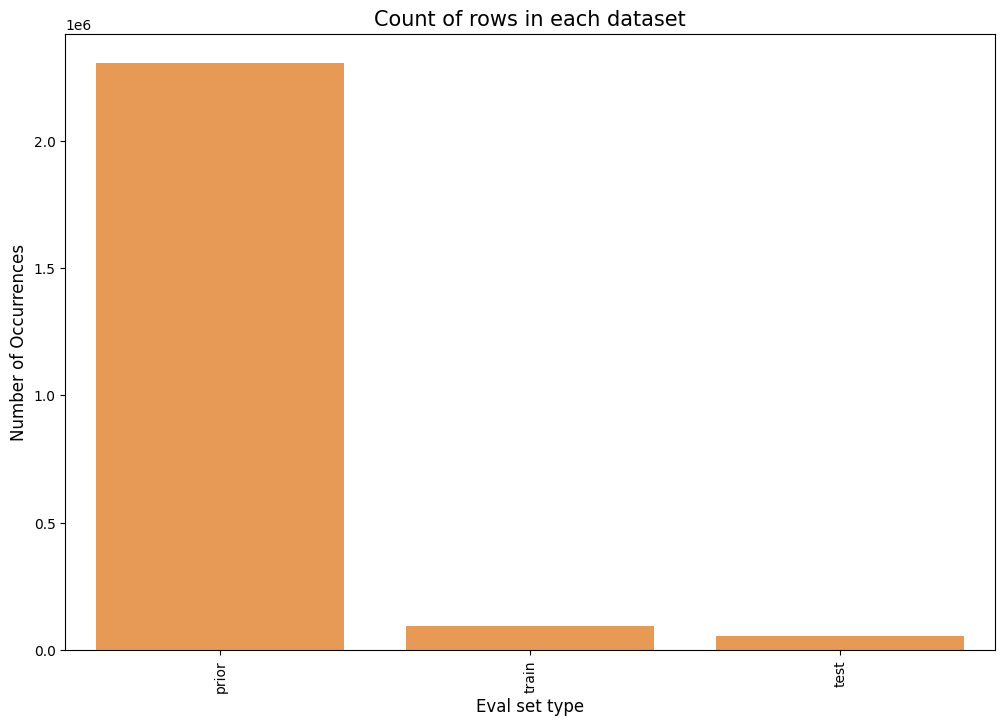

In [ ]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")
cnt_srs["user_id"].aggregate(get_unique_count)

,user_id
eval_set,
prior,147593
test,53773
train,93819


각 사용자별 마지막 order_number을 찾아 각 주문횟수가 몇 명의 사용자에게 나타나는지 확인해보자.

<ipython-input-14-dad3b8b9960f>:1: FutureWarning: The provided callable <function max at 0x7914550589a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


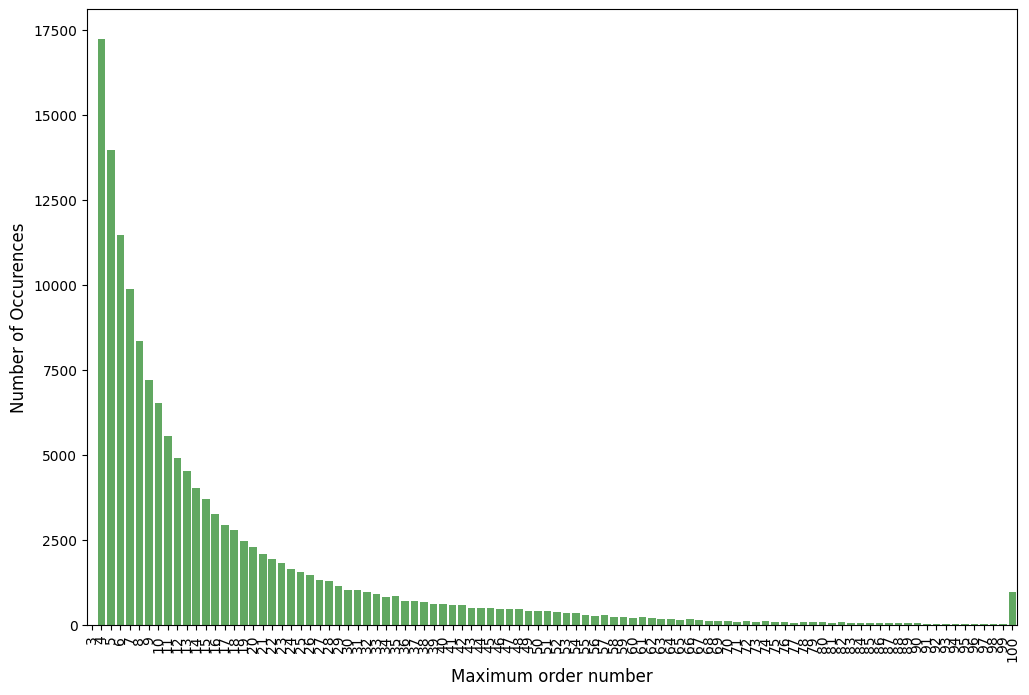

In [ ]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

*cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()*
* "user_id" 별로 df를 그룹화하고, "order_number" 칼럼에 대해 np.max 연산을 적용하여 각 사용자가 주문한 횟수 중 최댓값을 찾는다.
* 그룹한 결과는 기본적으로 인덱스가 "user_id"가 되는데 이를 일반적인 데이터 프레임 형태로 변환하기 위해 *reset_index()*  코드를 이용한다.

*cnt_srs = cnt_srs.order_number.value_counts()*
* order_number 값별로 등장 횟수를 센다.


**order_number는 4-100 사이의 값으로 나타난다.**

이번엔 요일에 따른 주문 습관에 대해 알아보자.

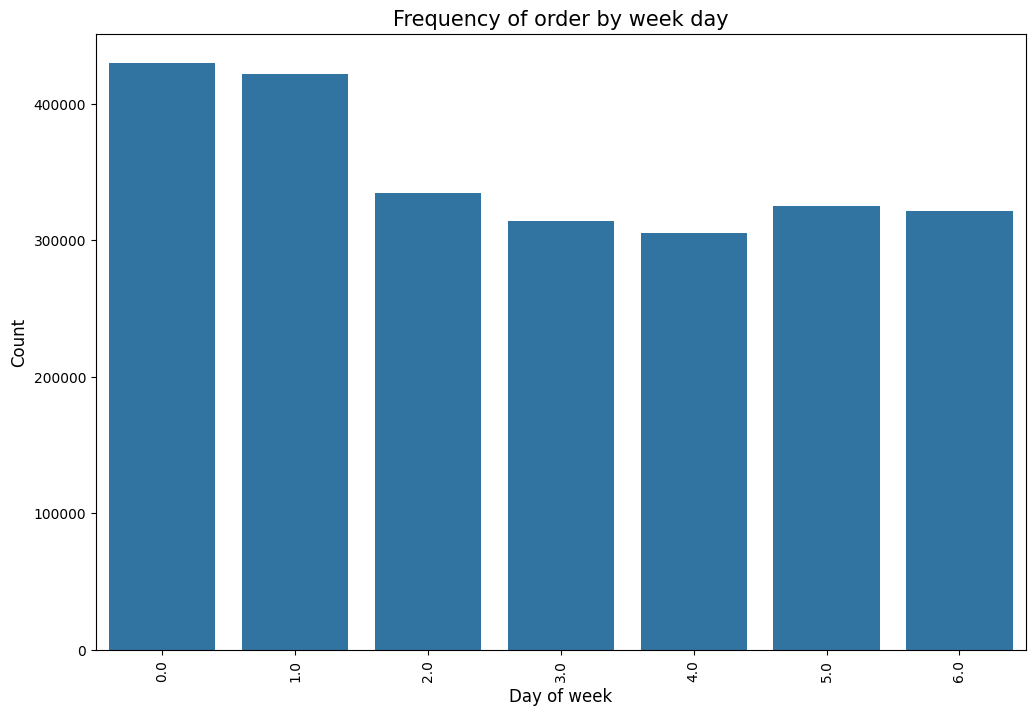

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

**0과 1에 주문량이 많은것으로 보아 토요일과 일요일로 추정할 수 있고, 수요일에 주문량이 제일 적은 것을 확인할 수 있다.**

이번엔 하루 중 시간에 따른 분포가 어떤지 알아보자.

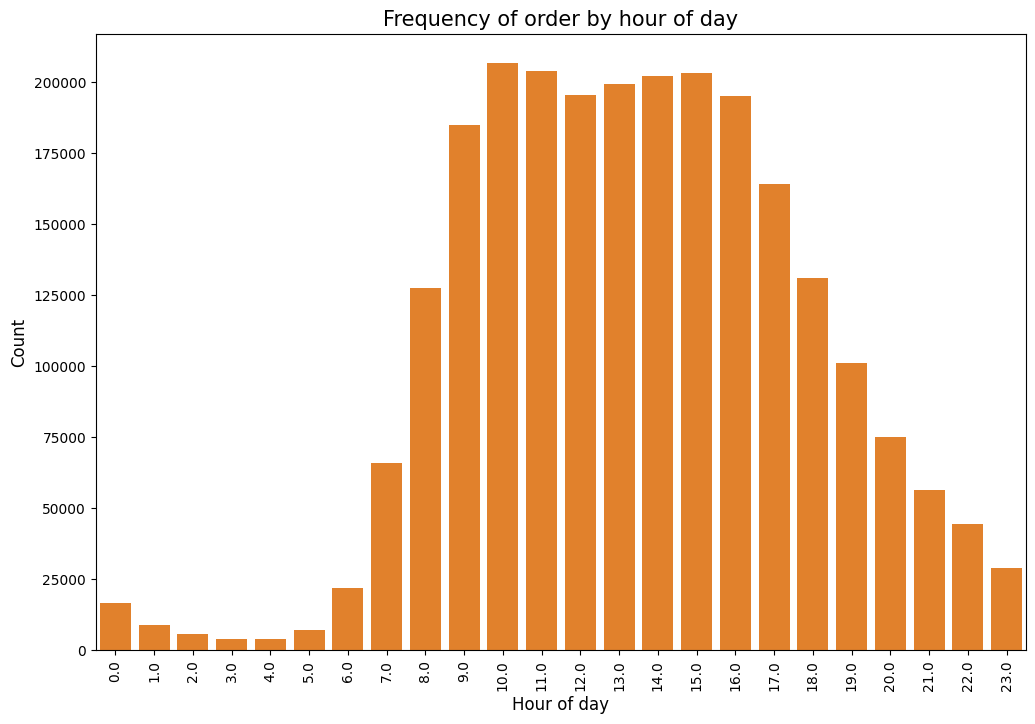

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

**대부분의 주문은 낮 시간대에 이루어짐을 알 수 있다.**

이번엔 요일과 시간을 결합해 분포를 살펴보자.

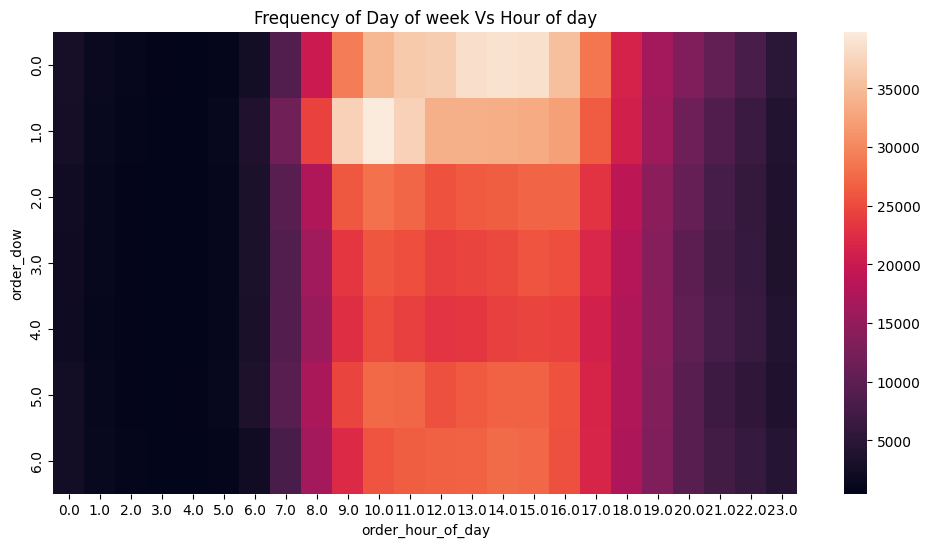

In [ ]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

**토요일 저녁과 일요일 아침에 가장 많은 주문량이 나타난다.**

이번엔 주문 간의 간격에 대해 살펴보자.

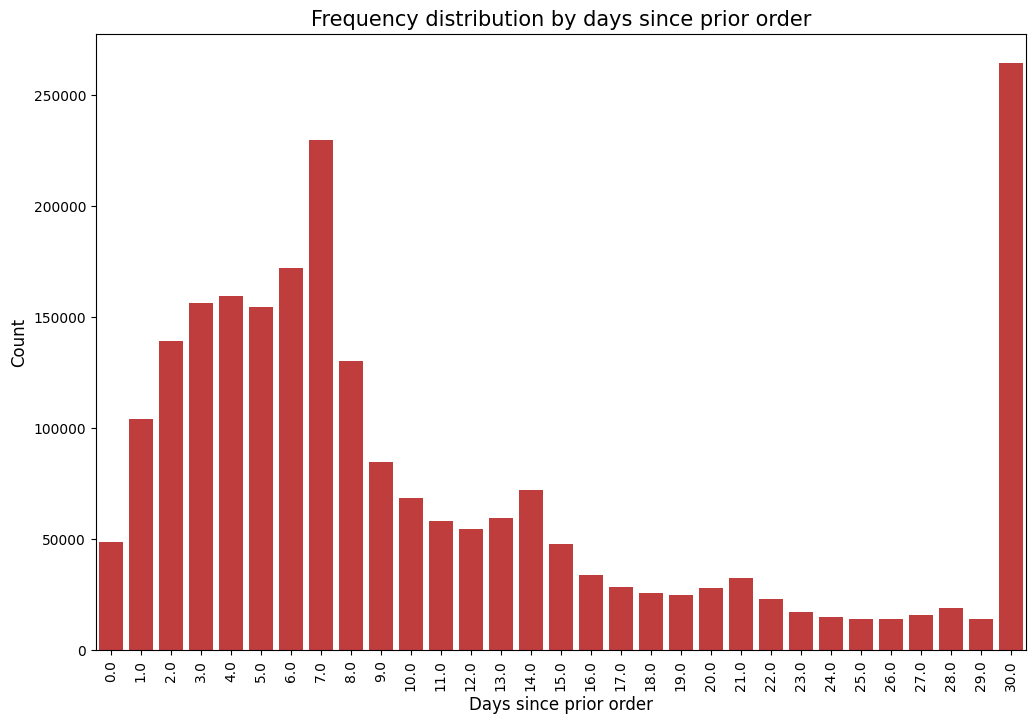

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

**고객들은 주로 일주일 혹은 한 달에 한 번씩 주문하는 것으로 확인할 수 있다. 또한, 14, 21, 28일에 작은 peak가 나타나는 것을 확인할 수 있다.**

이번엔 prior set와 train set의 re-order 비율을 확인해보자.

re-order 비율은 reordered 열의 값을 모두 더한 값에서 전체 데이터프레임의 행의 개수를 나눈 값으로 구할 수 있다.

In [ ]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

np.float64(0.5898115551874094)

In [ ]:
# percentage of re-orders in train set#
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

np.float64(0.5985944127509629)

In [ ]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df.loc[grouped_df["reordered"]>1,"reordered"] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.87957
0,0.12043


In [ ]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df.loc[grouped_df["reordered"]>1,"reordered"] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.93444
0,0.06556


*grouped_df = order_products_prior_df.groupby("order_id").["reordered"].aggregate("sum").reset_index()*
* "order_id"를 기준으로 데이터를 그룹화한 뒤, "reorder" 컬럼의 값을 합산한다.
* 이를 통해 한 "order_id" 내에서 재주문된 상품 개수를 구할 수 있다.

*grouped_df.loc[grouped_df["reordered"]>1,"reordered"] = 1*
* "reordered"가 1 이상이면 1로 값을 변경한다.

*grouped_df.reordered.value_counts() / grouped_df.shape[0]*
* "reordered" 컬럼의 값이 0과 1인 경우가 각각 몇 개인지 계산한 후, 데이터의 개수로 나눈다.
* 재주문이 포함된 주문의 비율과 그렇지 않은 주문의 비율을 계산할 수 있다.

**prior set에서는 약 12%가 reorder된 품목이 없지만, train set에서는 6.5%가 reorder이 없다.**

이제 각 주문에서 구매한 제품의 수를 살펴보자.

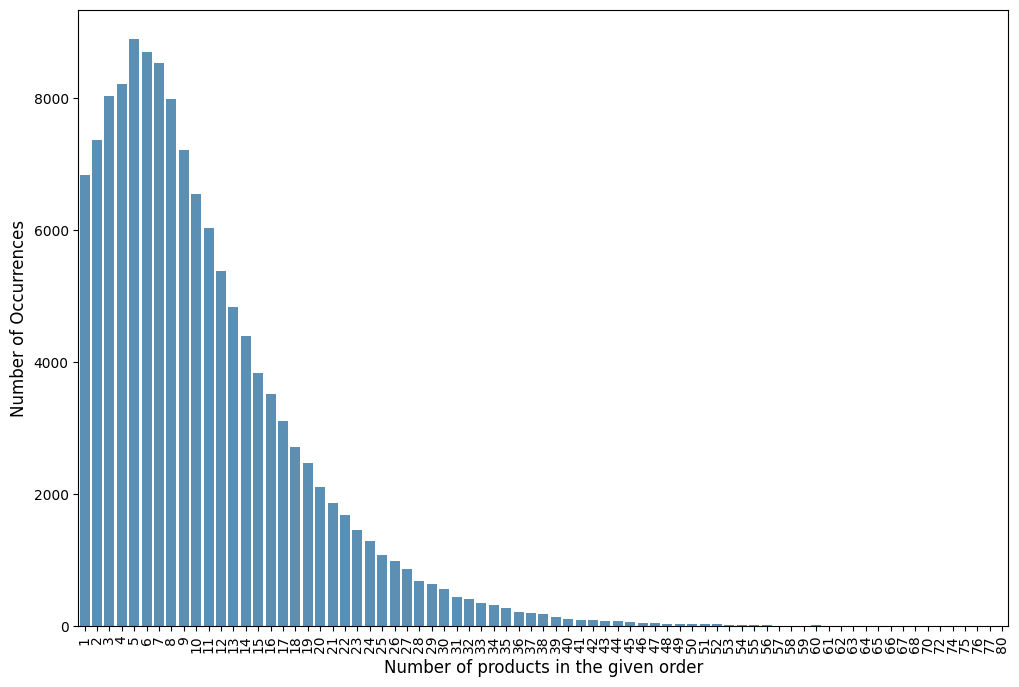

In [ ]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**5에서 최댓값을 가지며, 오른쪽 꼬리가 긴 분포가 나오는 것을 확인할 수 있다.**

In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


해당 df를 order_prior의 df와 병합해보자.

In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


*pd.merge(df1, df2, on="공통 컬럼", how="join 방식")*
* df1, df2: 합칠 두 개의 데이터 프레임
* on: 기준이 되는 컬럼
* how: join 방식(inner, left, right, outer)

In [ ]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name','frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,63430
1,Bag of Organic Bananas,50813
2,Organic Strawberries,35480
3,Organic Baby Spinach,32405
4,Organic Hass Avocado,28411
5,Organic Avocado,23603
6,Large Lemon,20472
7,Strawberries,19145
8,Limes,18796
9,Organic Whole Milk,18365


**대부분의 재구매 제품은 유기농 제품이며, 대부분 과일인 것을 확인할 수 있다.**

이번엔 aisle에 대해 알아보자.

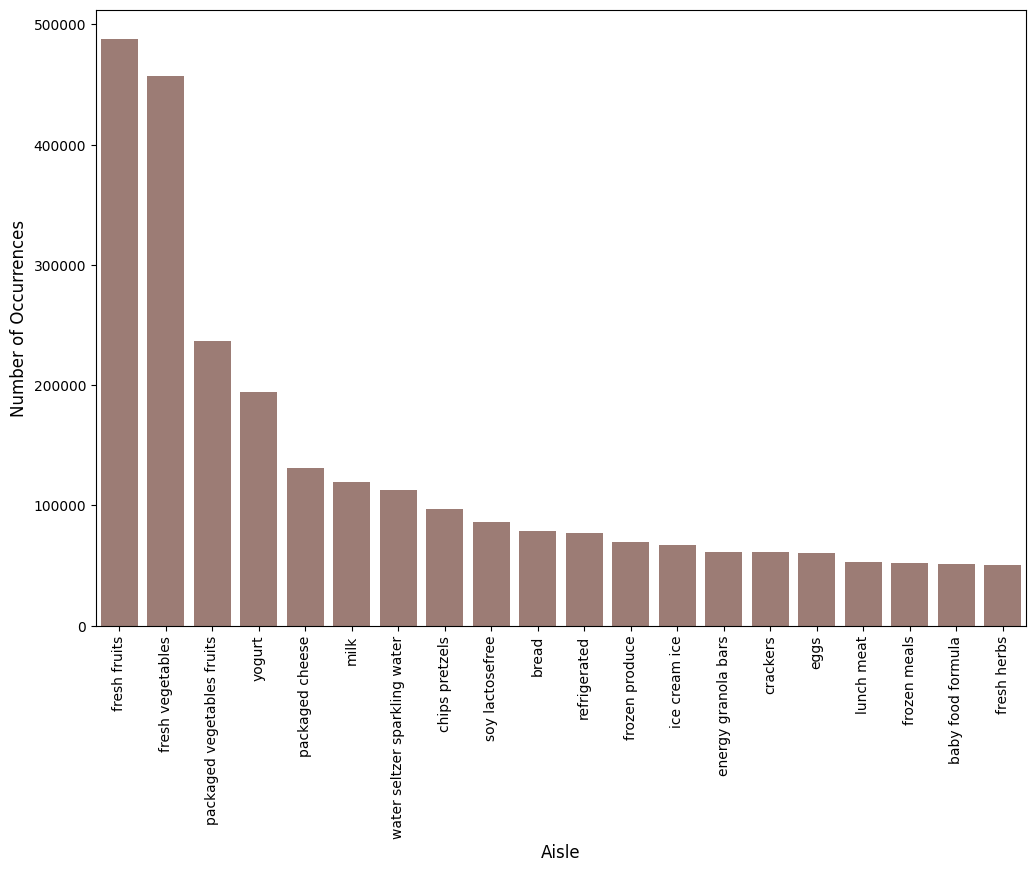

In [ ]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**상위 두 개의 aisles는 fresh fruits와 fresh vegetables이다.**

이번엔 department별 분포에 대해 살펴보자.

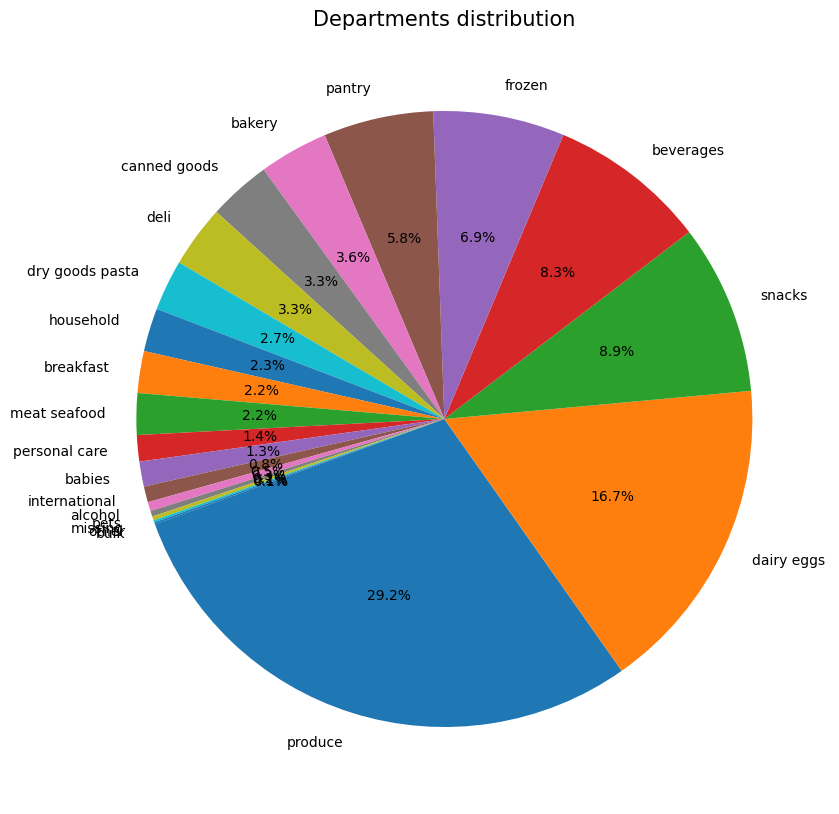

In [ ]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels,
       autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

**Produce가 가장 높은 department이다.**

이번엔 department별 reorder의 분포에 대해 살펴보자.

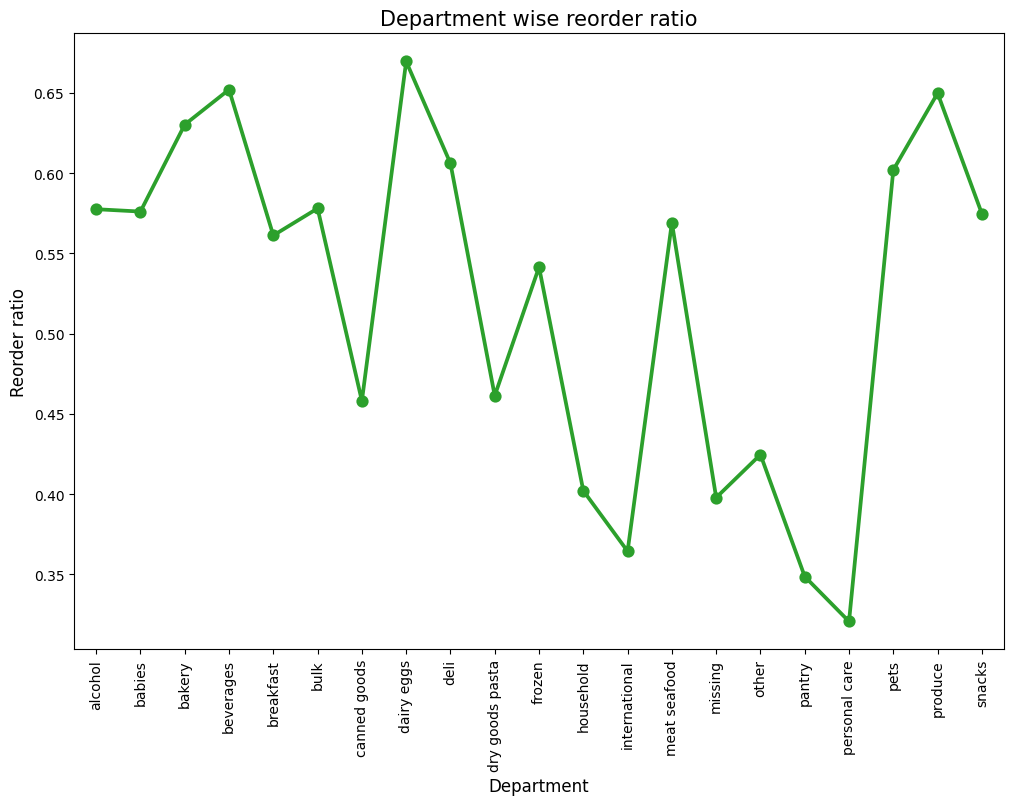

In [ ]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**personal care에서 reorder 비율이 가장 낮고, dairy eggs에서 reorder 비율이 가장 높은 것을 확인할 수 있다.**

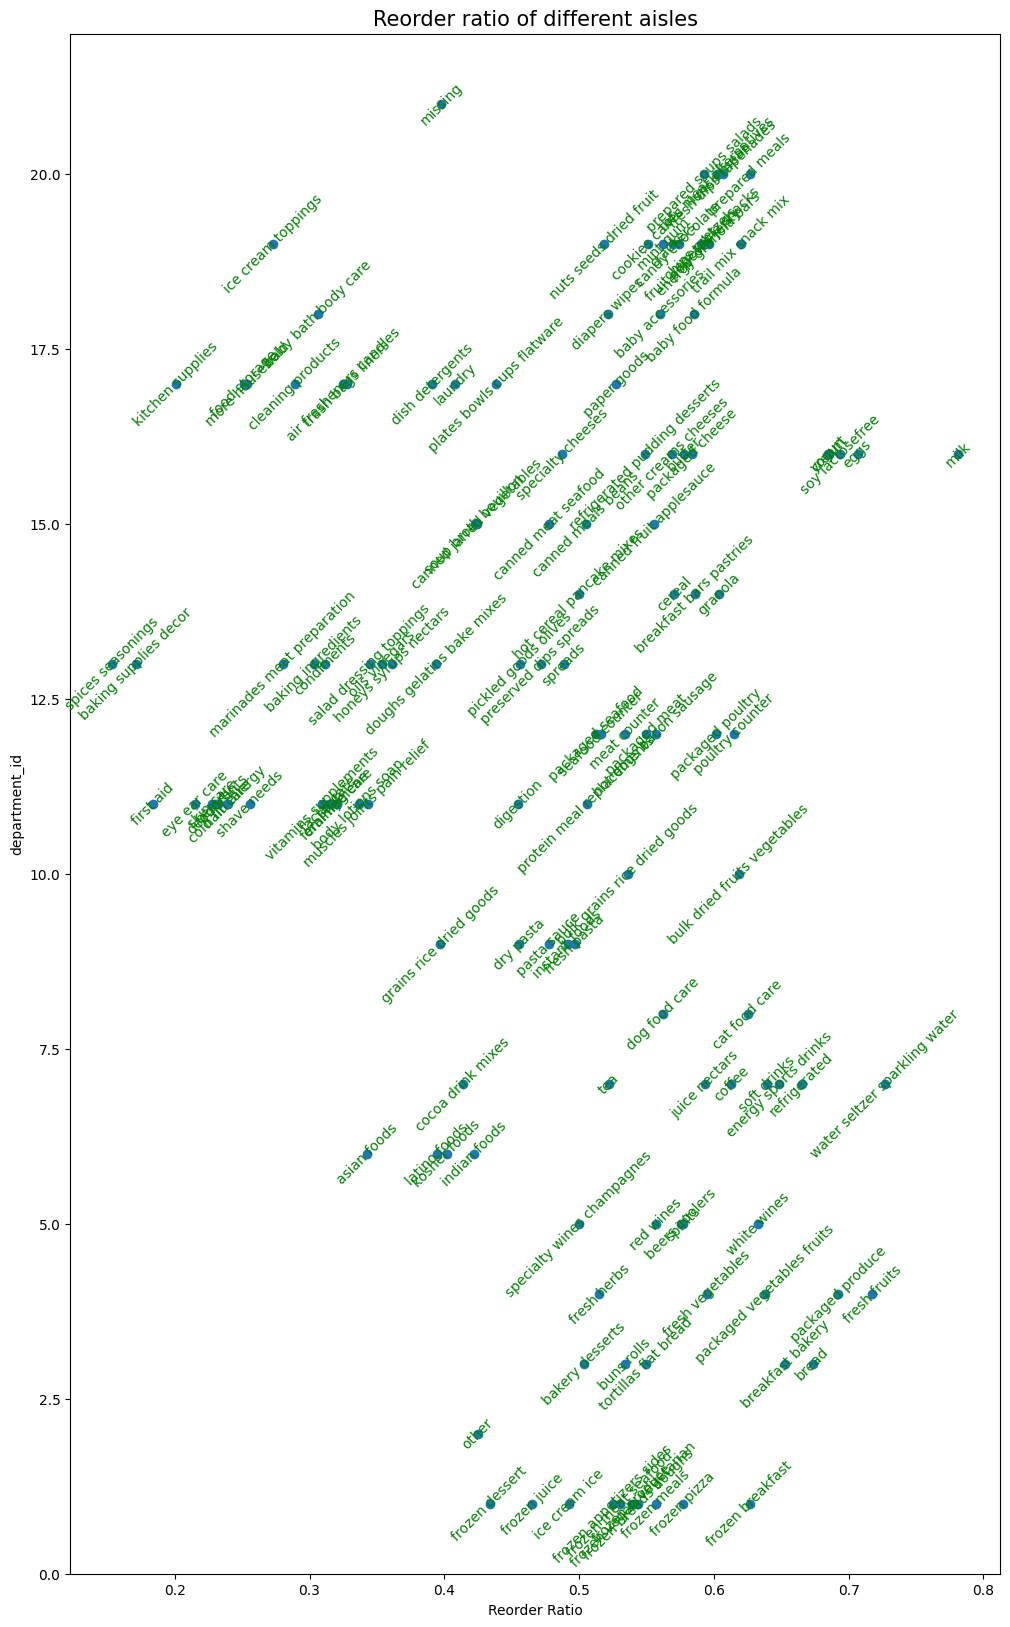

In [ ]:
grouped_df = order_products_prior_df.groupby(["department_id","aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]),
                rotation=45, ha = 'center', va='center', color='green')

plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

이번엔 제품을 추가하는 순서가 reorder ratio에 어떤 영향을 미치는지 살펴보자.

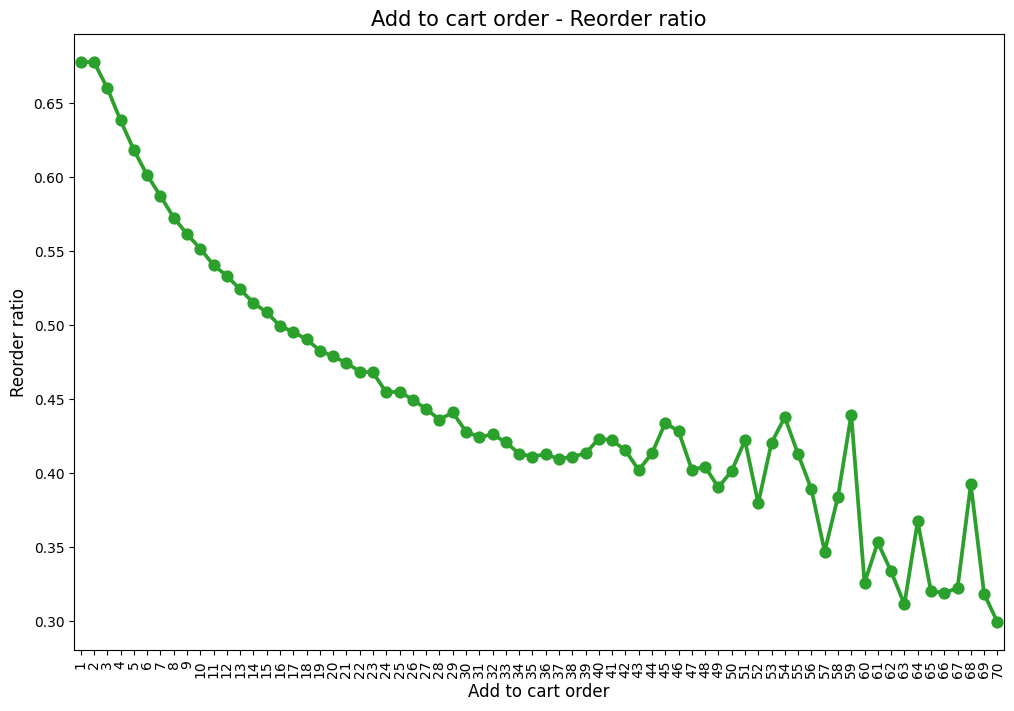

In [ ]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df.loc[order_products_prior_df["add_to_cart_order_mod"]>70, "add_to_cart_order_mod"] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**먼저 추가된 제품은 나중에 추가된 제품에 비해 reorder ratio가 높은 것으로 확인할 수 있다.**

이번엔 시간 변수가 reorder ratio에 미치는 영향 대해 살펴보자.

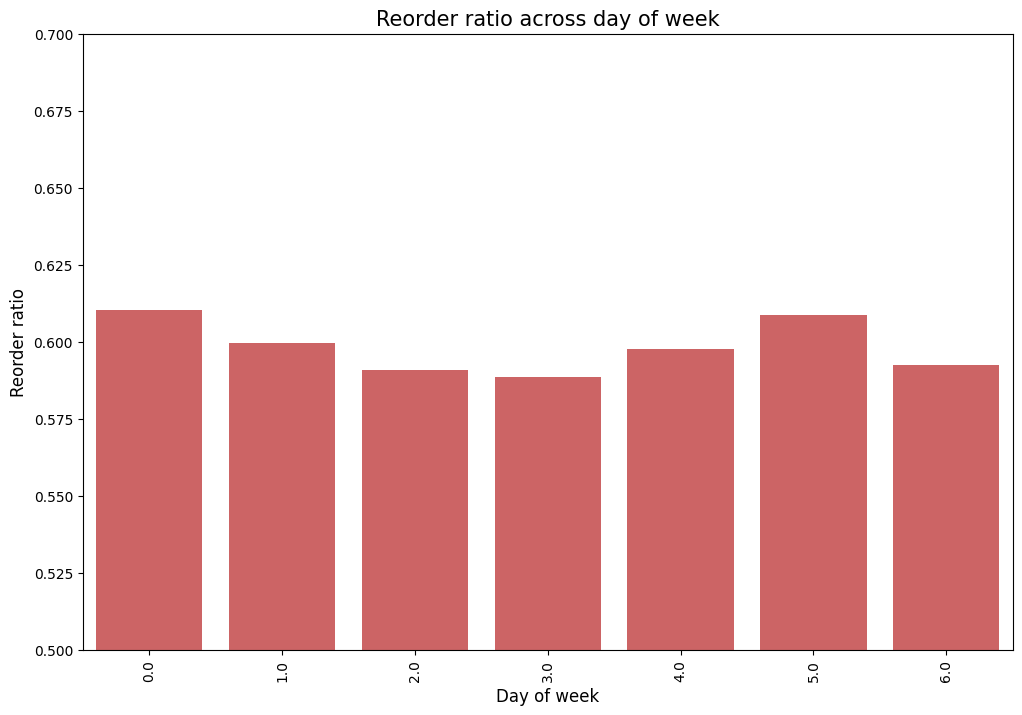

In [ ]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values, y=grouped_df['reordered'].values,
           alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

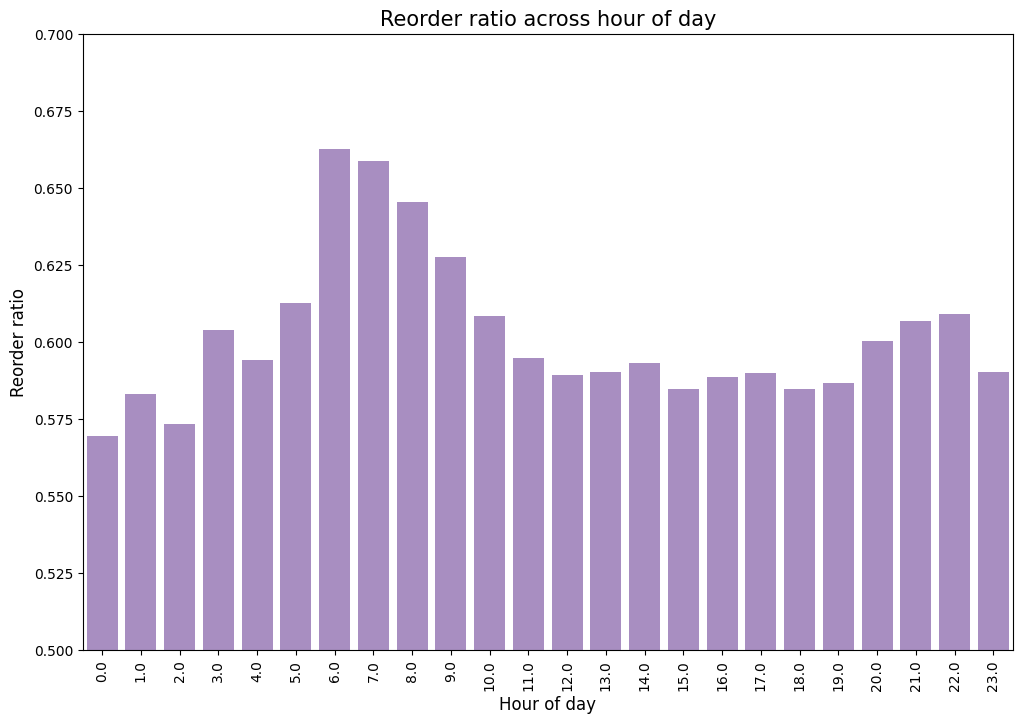

In [ ]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values, y=grouped_df['reordered'].values,
            alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

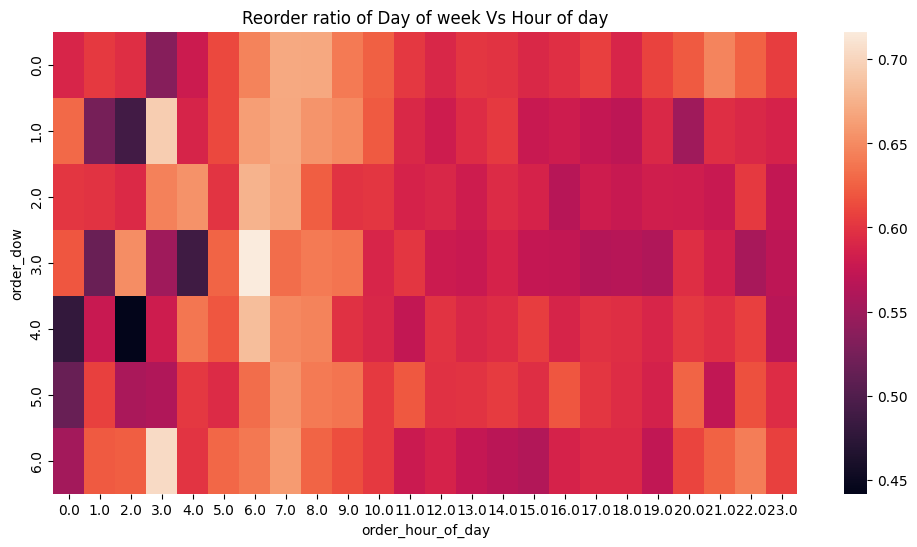

In [ ]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

**이른 아침이 후반부에 주문한 것에 비해 reorder ratio가 더 높은 것으로 확인할 수 있다.**

## **새로운 전처리/시각화 적용: reorder ratio에 주문 건수가 미치는 영향에 대해 살펴보기**

In [ ]:
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")

In [ ]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


In [ ]:
# prior set의 데이터프레임 병합
orders_df_filtered = orders_df[orders_df["eval_set"] == "prior"]
prior = pd.merge(orders_df_filtered, order_products_prior_df, on="order_id")
prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,473747,1,prior,3,3,12,21.0,196,1.0,1.0
1,473747,1,prior,3,3,12,21.0,12427,2.0,1.0
2,473747,1,prior,3,3,12,21.0,10258,3.0,1.0
3,473747,1,prior,3,3,12,21.0,25133,4.0,0.0
4,473747,1,prior,3,3,12,21.0,30450,5.0,0.0


In [ ]:
# 총 주문 횟수 계산
user_order_count = prior.groupby(["user_id"])["order_number"].max().reset_index()

# 고객별 reorder ratio 계산
user_reorder_ratio = prior.groupby(["user_id"])["reordered"].mean().reset_index()

# 두 데이터프레임 병합
user_stats = pd.merge(user_order_count, user_reorder_ratio, on="user_id")

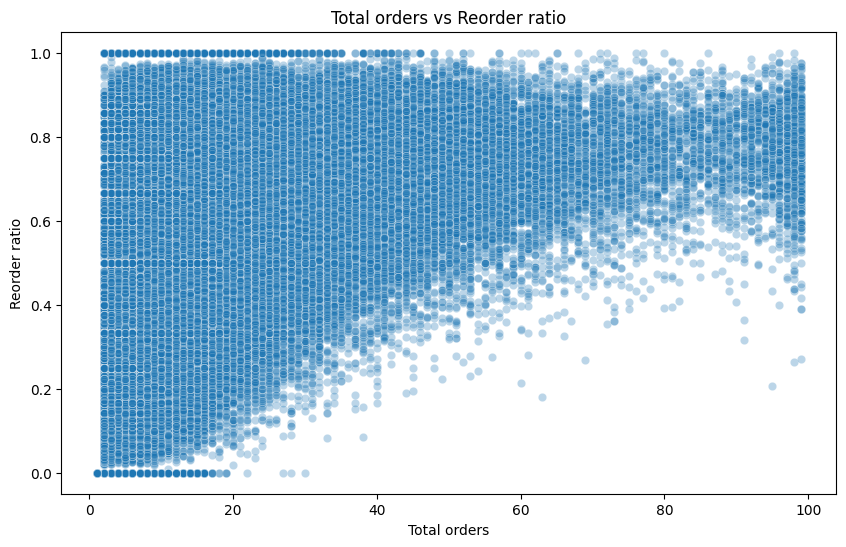

In [ ]:
# Scatter Plot 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x=user_stats["order_number"], y=user_stats["reordered"], alpha=0.3)

plt.xlabel("Total orders")
plt.ylabel("Reorder ratio")
plt.title("Total orders vs Reorder ratio")
plt.show()

**Total orders가 많을 수록 reorder ratio가 높다고 보기는 힘들지만, total orders가 적으면 reorder ratio는 전구간에 걸쳐 넓게 분포하고, total orders가 많을 수록 reorder ratio가 높은 부분에 분포하는 것을 알 수 있다.**